# Creating Sliders in Jupyter Notebooks - Part II

This notebook illustrates how to create sliders using `ipywidgets` for interactive plots.

### Credits:
Some materials developed in this notebook were inspired by https://github.com/jckantor/CBE30338

## 2. Make better sliders
The method in Part I is slow because it redraws the entire figure everytime you move the slider. If you try to use that method with many data points or multiple plots, the slider feels very laggy.

To avoid redrawing the entire figure, we can use the `set_data` function to manipulate the data directly.

### Note: If you don't see any plots
This part uses the matplotlib interactive `notebook` backend instead of the `inline` backend. You need to restart the kernel `Kernel > Restart` using the menu buttons at the top of your screen for the interactive notebook plot to display properly.

In [1]:
# Import the libraries we'll need. We'll be using the notebook backend instead of the inline backend
%matplotlib notebook
%config InlineBackend.figure_formats = {'svg',} # svg makes the figures look nicer
import matplotlib.pyplot as plt
import numpy as np
import control
import warnings
warnings.filterwarnings('ignore') #suppress all warnings

In [2]:
# Define the transfer function
def tf(K_p, tau_I, print_variables=False):
    G   = control.tf([1],[1,0])  # Transfer function for the process
    G_c = K_p*control.tf([tau_I,1],[tau_I*1,0]) # Transfer function for the controller
    sys = G_c*G/(1+G_c*G) # The closed loop transfer function
    if print_variables:
        print('Process TF: ', G)
        print('Controller TF: ', G_c)
        print('Closed-Loop TF: ', sys)
    return sys, T

Process TF:  
1
-
s

Controller TF:  
s + 1
-----
  s

Closed-Loop TF:  
   s^3 + s^2
---------------
s^4 + s^3 + s^2



<IPython.core.display.Javascript object>


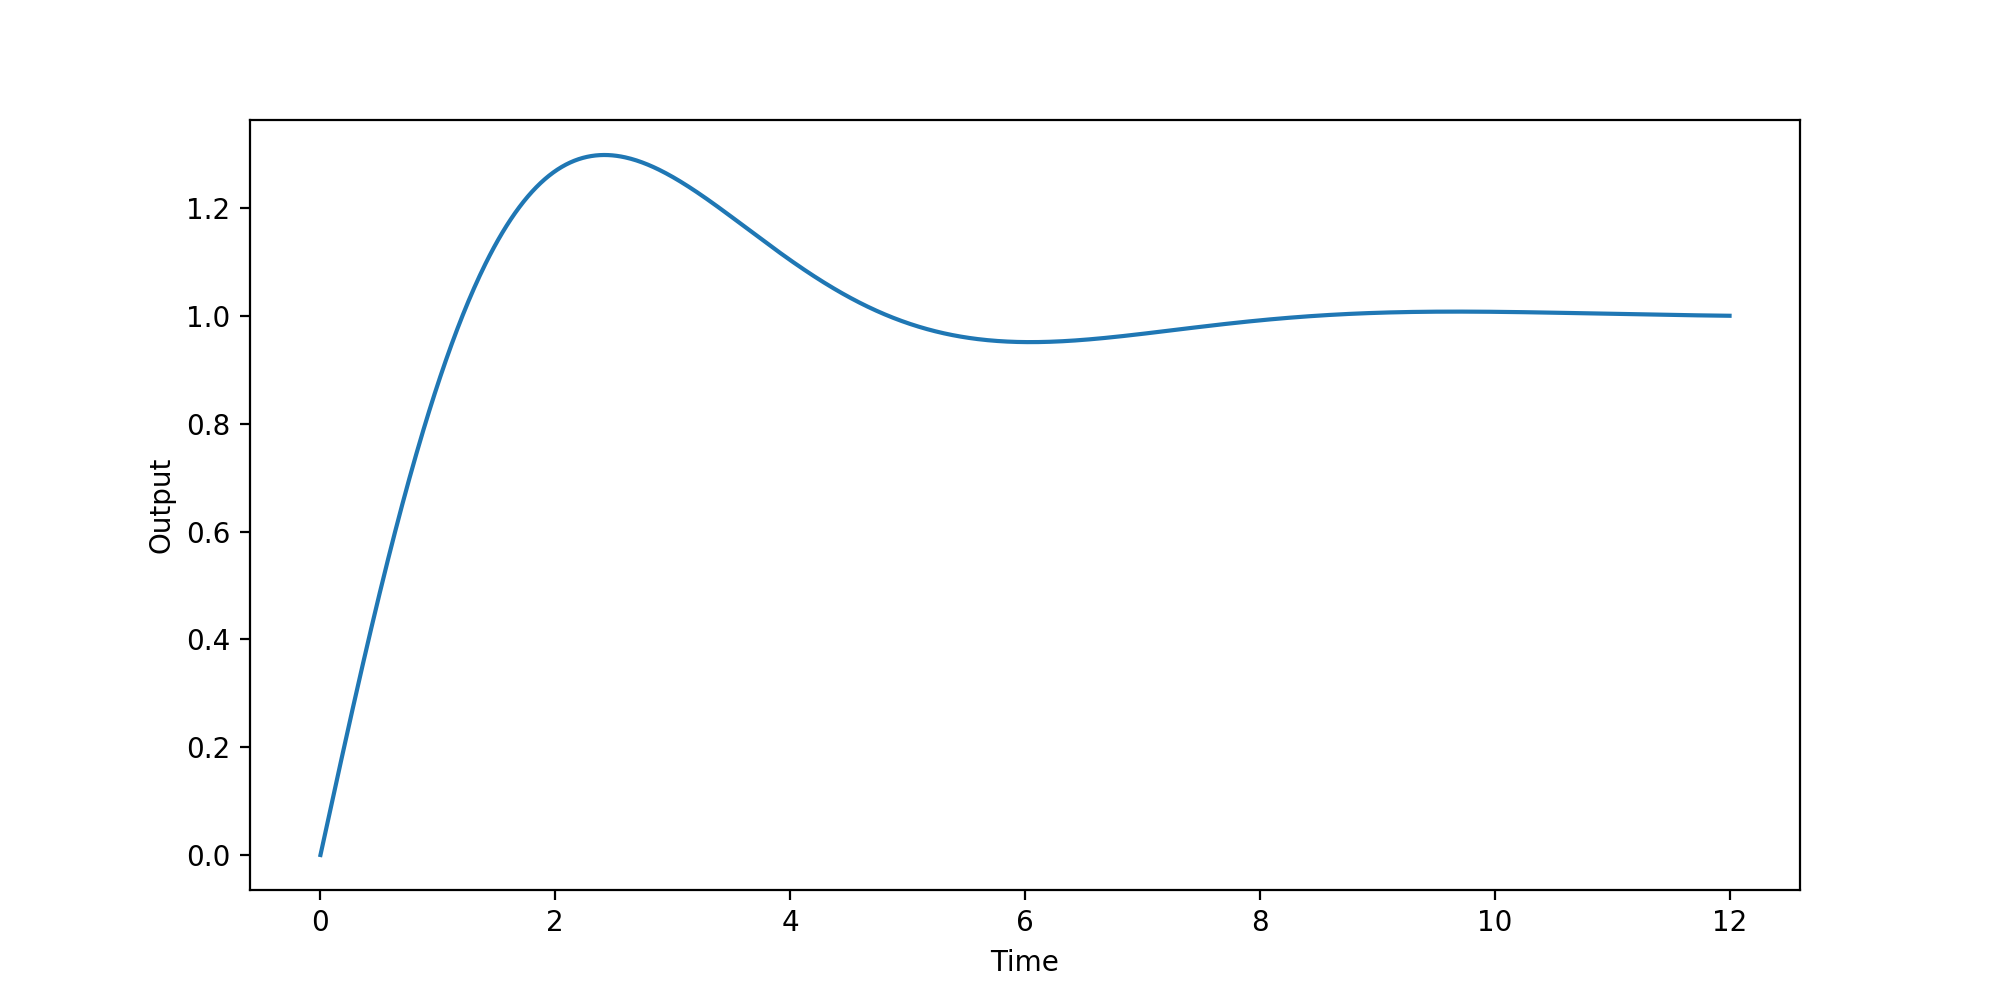

In [3]:
# Define our TF parameters 
K_p = 1
tau_I = 1
T = np.linspace(0,12,1000) # Time scale of the process, we'll use 12 seconds
sys, T = tf(1,1,print_variables=True)

# Generate a step response
t, u = control.step_response(sys,T=T)

# Plot the TF
plt.figure(1, figsize=(10,5))
plt.xlabel('Time')
plt.ylabel('Output')
plt.plot(t,u)
plt.show()

In [5]:
# Import libraries we need for interactive sliders
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from ipywidgets.widgets.interaction import interact
import ipywidgets.widgets as widgets

We'll plot a more complicated figure this time. Instead of just a single plot, we'll plot 3 subfigures: the Bode magnitude and phase plots and the time-domain response.

<IPython.core.display.Javascript object>


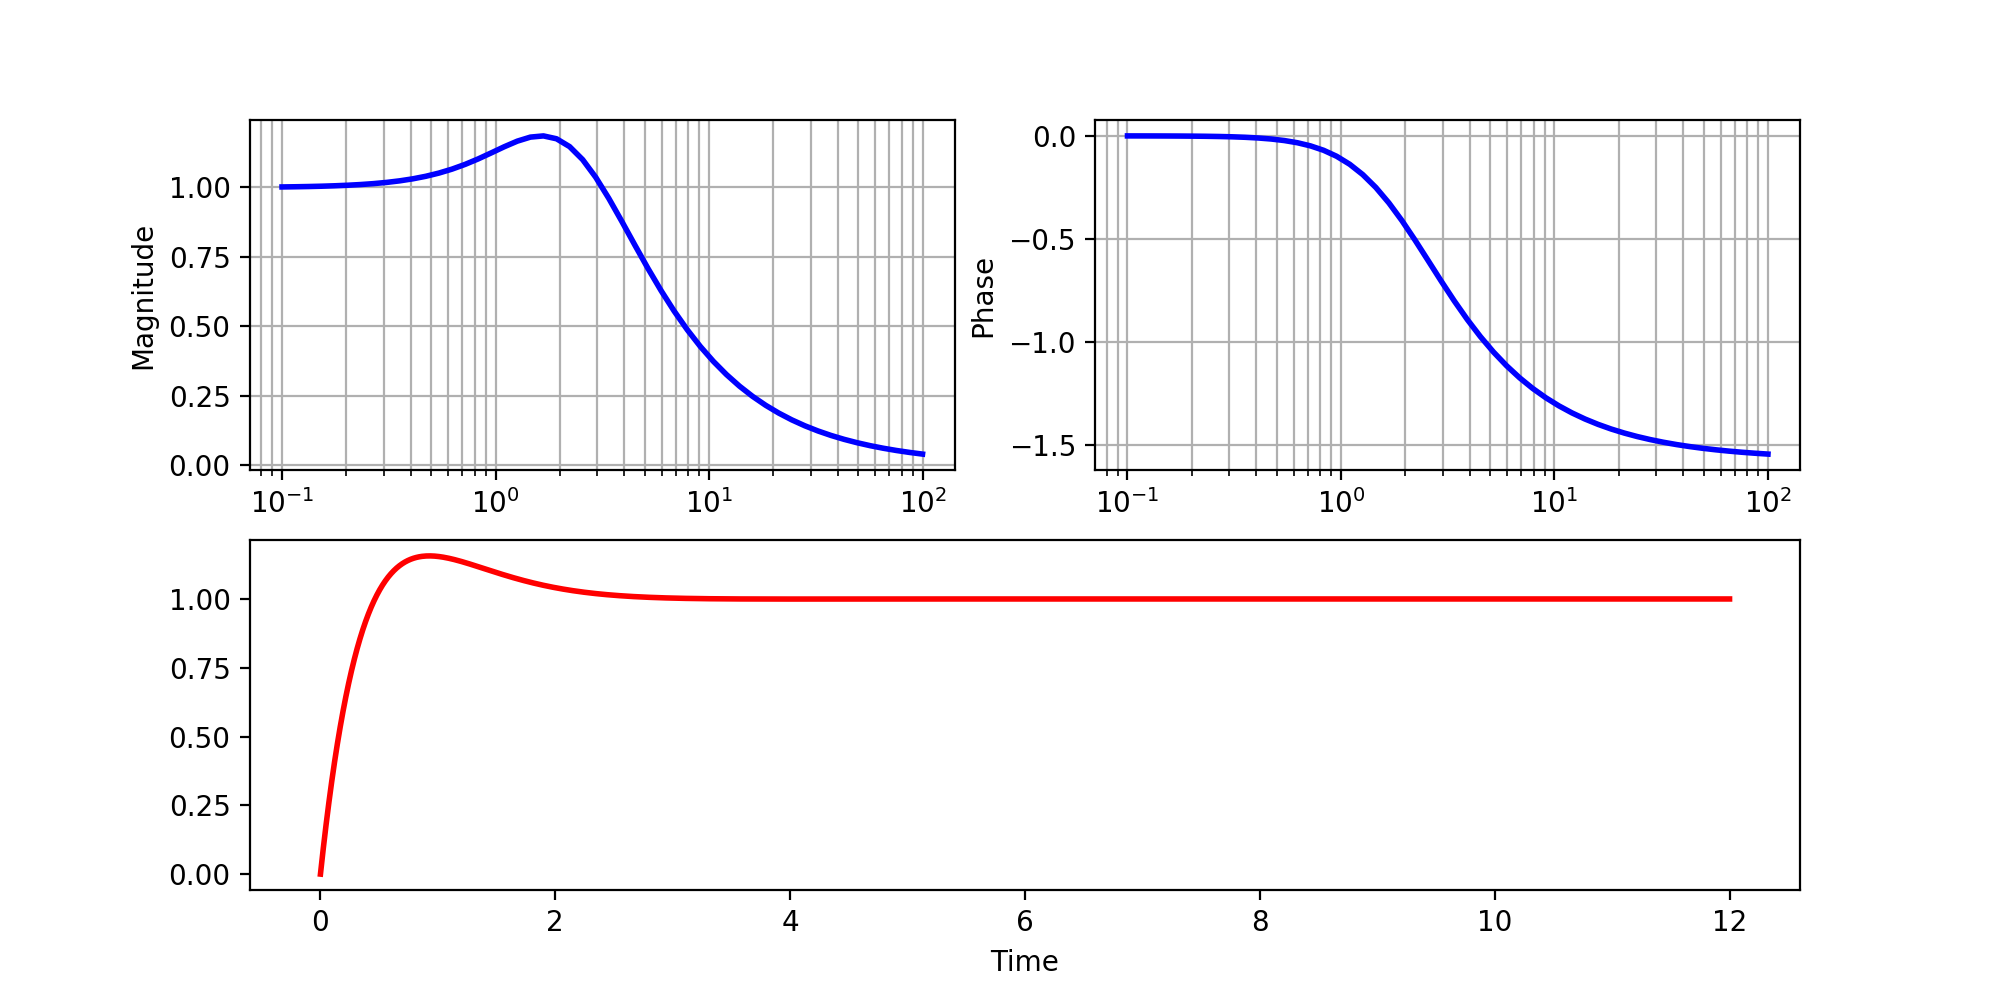

In [8]:
# Set up an empty figure, create sub plots
gs = gridspec.GridSpec(2, 2)
f = plt.figure(figsize=(10,5))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax1.grid(True, which='both')
ax2 = plt.subplot(gs[0, 1]) # row 0, col 1
ax2.grid(True, which='both')
ax3 = plt.subplot(gs[1, :]) # row 1, span all columns
line1, = ax1.semilogx([], [], 'b', lw=2)
line2, = ax2.semilogx([], [], 'b', lw=2)
line3, = ax3.plot([], [], 'r', lw=2)
ax1.set_ylabel('Magnitude')
ax2.set_ylabel('Phase')
ax3.set_xlabel('Time');

# Our interactive function 
def g(K_p, tau_I, line1, line2, line3):
    sys, T = tf(K_p, tau_I)
    mag, phase, omega = control.bode(sys, Plot=False);
    t, u = control.step_response(sys,T=T)
    line1.set_data(omega, mag)
    line2.set_data(omega, phase)
    line3.set_data(t,u)
    ax1.relim()
    ax2.relim()
    ax3.relim()
    ax1.autoscale_view()
    ax2.autoscale_view()
    ax3.autoscale_view()    
    f.canvas.draw()

# The ipywidget sliders
def plot_interactive():
    def f(K_p, tau_I):
        g(K_p, tau_I, line1, line2, line3)
    tau_slider = widgets.FloatSlider(description='Tau', min=0.1, max=5)
    K_slider = widgets.FloatSlider(description='K_p', min=0.1, max=10)
    interact(f, tau_I=tau_slider, K_p=K_slider)

plot_interactive()